In [1]:
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import missingno

In [2]:
df = pd.read_csv("../data/application_data.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data_descriptions = pd.read_csv("../data/columns_description.csv", encoding='latin1')
data_descriptions.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [4]:
df_vars_non_abitazione = data_descriptions[(data_descriptions['Unnamed: 0'] < 47) | (data_descriptions['Unnamed: 0'] > 93)]
vars_non_abitazione = df_vars_non_abitazione['Row'].to_list()

In [5]:
df = df[vars_non_abitazione]

In [6]:
df = df.drop(columns=['EXT_SOURCE_1','EXT_SOURCE_3'])

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
helper_df = df[(df['FLAG_OWN_CAR'] == 'Y') & (df['OWN_CAR_AGE'].isna())]
df.drop(helper_df.index, inplace=True)

In [9]:
df[(df['FLAG_OWN_CAR'] == 'Y') & (df['OWN_CAR_AGE'].isna())]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [10]:
df = df[(df['DAYS_LAST_PHONE_CHANGE'].notna()) & (df['AMT_ANNUITY'].notna()) & (df['NAME_TYPE_SUITE'].notna()) & (df['CNT_FAM_MEMBERS'].notna()) & (df['EXT_SOURCE_2'].notna()) & (df['DEF_60_CNT_SOCIAL_CIRCLE'].notna()) & (df['AMT_REQ_CREDIT_BUREAU_QRT'] != 261.0)]

<AxesSubplot: >

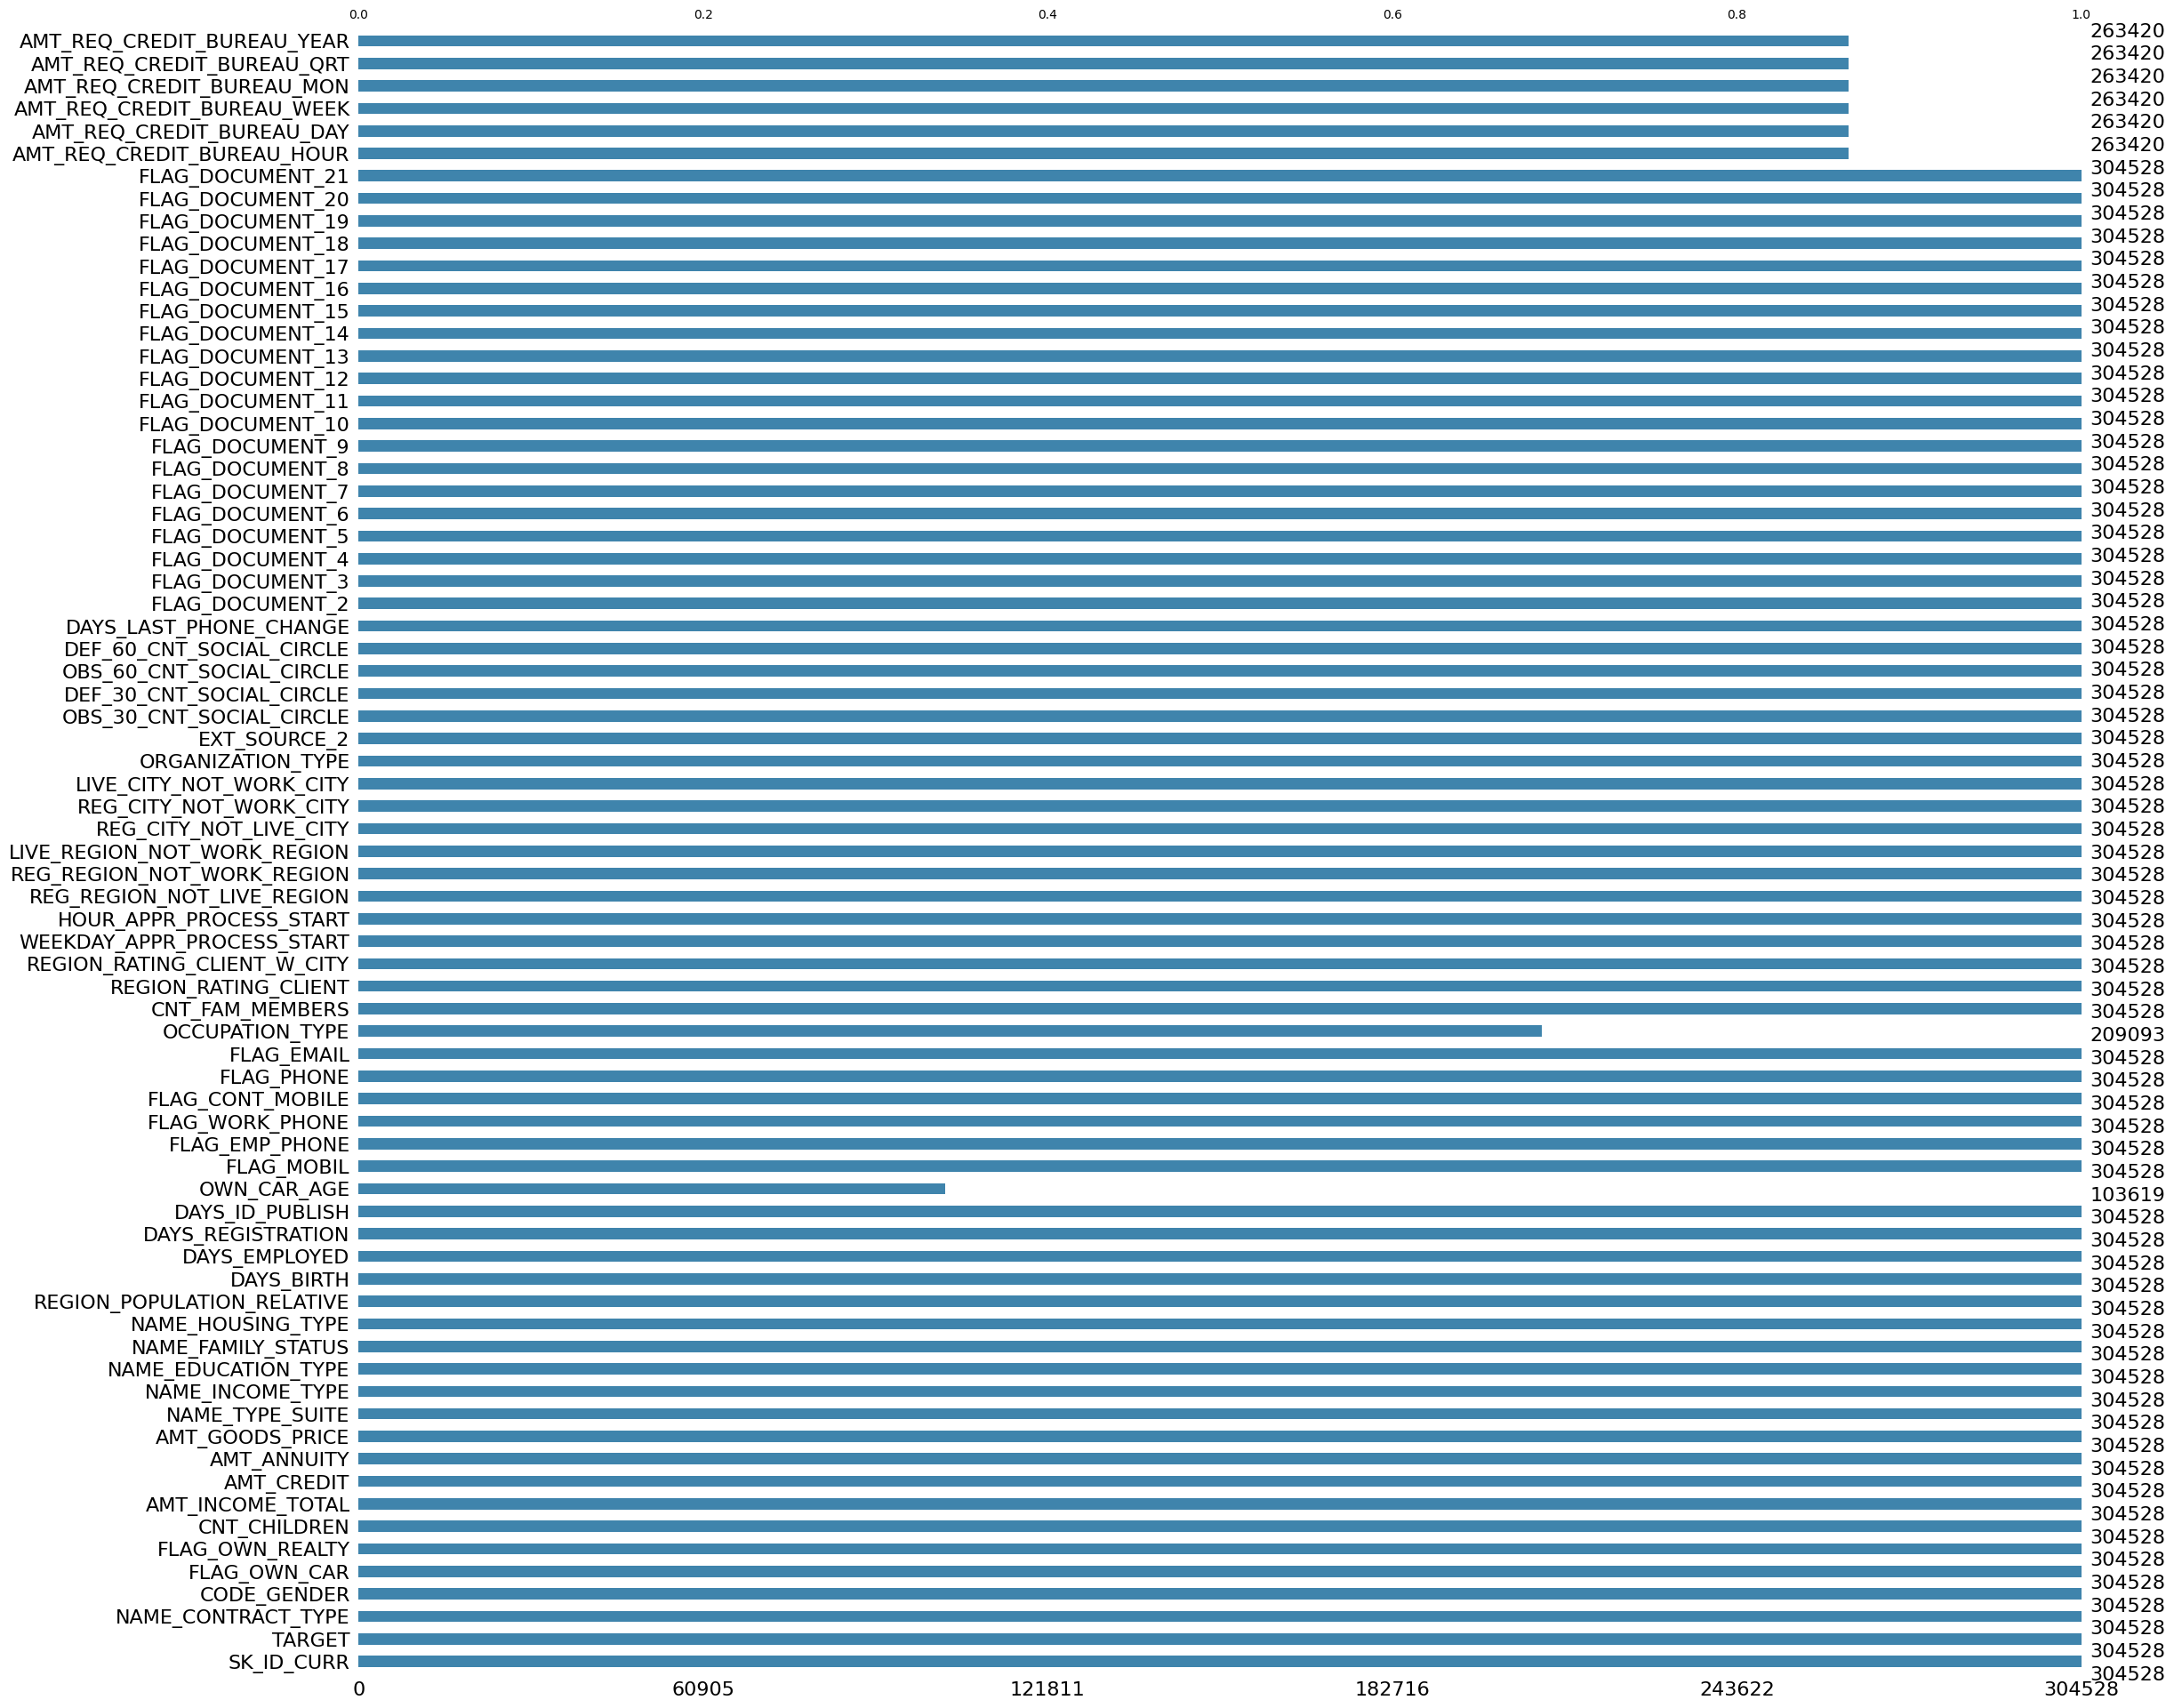

In [11]:
%matplotlib inline
missingno.bar(df, color=(63/255,132/255,172/255))

In [12]:
aux_df = df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR']]

AMT_REQ_CREDIT_BUREAU_DAY_list = aux_df.apply(lambda vec : vec[0]+1 ,axis=1).tolist()
AMT_REQ_CREDIT_BUREAU_HOUR_list = aux_df.apply(lambda vec : vec[1]+1 ,axis=1).tolist()
AMT_REQ_CREDIT_BUREAU_MON_list = aux_df.apply(lambda vec : vec[2]+1 ,axis=1).tolist()
AMT_REQ_CREDIT_BUREAU_QRT_list = aux_df.apply(lambda vec : vec[3]+1 ,axis=1).tolist()
AMT_REQ_CREDIT_BUREAU_WEEK_list = aux_df.apply(lambda vec : vec[4]+1 ,axis=1).tolist()
AMT_REQ_CREDIT_BUREAU_YEAR_list = aux_df.apply(lambda vec : vec[5]+1 ,axis=1).tolist()
df['AMT_REQ_CREDIT_BUREAU_DAY'] = AMT_REQ_CREDIT_BUREAU_DAY_list
df['AMT_REQ_CREDIT_BUREAU_HOUR'] = AMT_REQ_CREDIT_BUREAU_HOUR_list
df['AMT_REQ_CREDIT_BUREAU_MON'] = AMT_REQ_CREDIT_BUREAU_MON_list
df['AMT_REQ_CREDIT_BUREAU_QRT'] = AMT_REQ_CREDIT_BUREAU_QRT_list
df['AMT_REQ_CREDIT_BUREAU_WEEK'] = AMT_REQ_CREDIT_BUREAU_WEEK_list
df['AMT_REQ_CREDIT_BUREAU_YEAR'] = AMT_REQ_CREDIT_BUREAU_YEAR_list


In [13]:
df['AMT_REQ_CREDIT_BUREAU_DAY']

0         1.0
1         1.0
2         1.0
3         NaN
4         1.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    1.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 304528, dtype: float64

In [14]:
values = {'AMT_REQ_CREDIT_BUREAU_DAY' : 0, 'AMT_REQ_CREDIT_BUREAU_HOUR' : 0, 'AMT_REQ_CREDIT_BUREAU_MON' : 0, 'AMT_REQ_CREDIT_BUREAU_QRT' : 0, 'AMT_REQ_CREDIT_BUREAU_WEEK' : 0, 'AMT_REQ_CREDIT_BUREAU_YEAR' : 0}
df = df.fillna(value=values)

In [15]:
df['AMT_REQ_CREDIT_BUREAU_DAY']

0         1.0
1         1.0
2         1.0
3         0.0
4         1.0
         ... 
307506    0.0
307507    0.0
307508    1.0
307509    1.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 304528, dtype: float64

<AxesSubplot: ylabel='Count'>

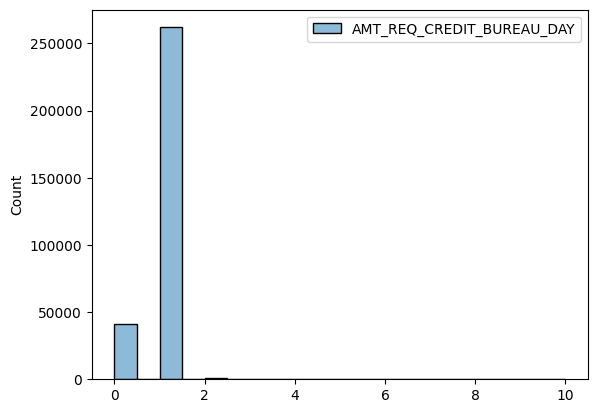

In [16]:
sns.histplot(df[['AMT_REQ_CREDIT_BUREAU_DAY']])

In [17]:
values = {'OCCUPATION_TYPE' : 'NaN'}
df = df.fillna(value=values)

In [18]:
def own_car_age_transformation_function(val):
    if ((val >= 0) & (val < 5)):
        return '0-5'
    elif ((val >= 5) & (val < 10)):
        return '5-10'
    elif ((val >= 10) & (val < 15)):
        return '10-15'
    elif ((val >= 15) & (val < 20)):
        return '15-20'
    elif ((val >= 20) & (val < 25)):
        return '20-25'
    elif ((val >= 25) & (val < 30)):
        return '25-30'
    elif (val >= 30):
        return '>=30'
    else:
        return 'NaN'


In [19]:
aux_df = df[['OWN_CAR_AGE']]

OWN_CAR_AGE_list = aux_df.apply(lambda vec : own_car_age_transformation_function(vec[0]) ,axis=1).tolist()
df['OWN_CAR_AGE'] = OWN_CAR_AGE_list

<AxesSubplot: xlabel='OWN_CAR_AGE', ylabel='Count'>

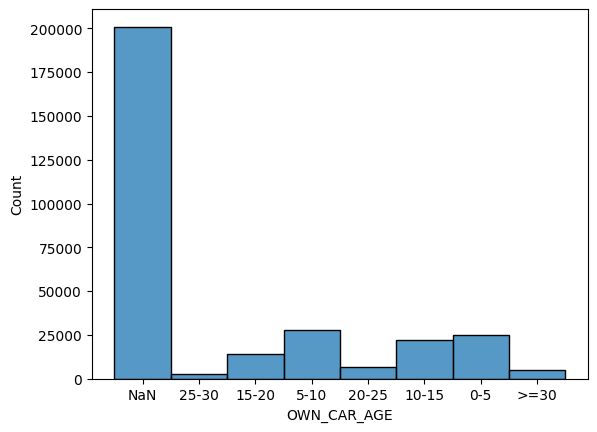

In [20]:
sns.histplot(df['OWN_CAR_AGE'])

<AxesSubplot: >

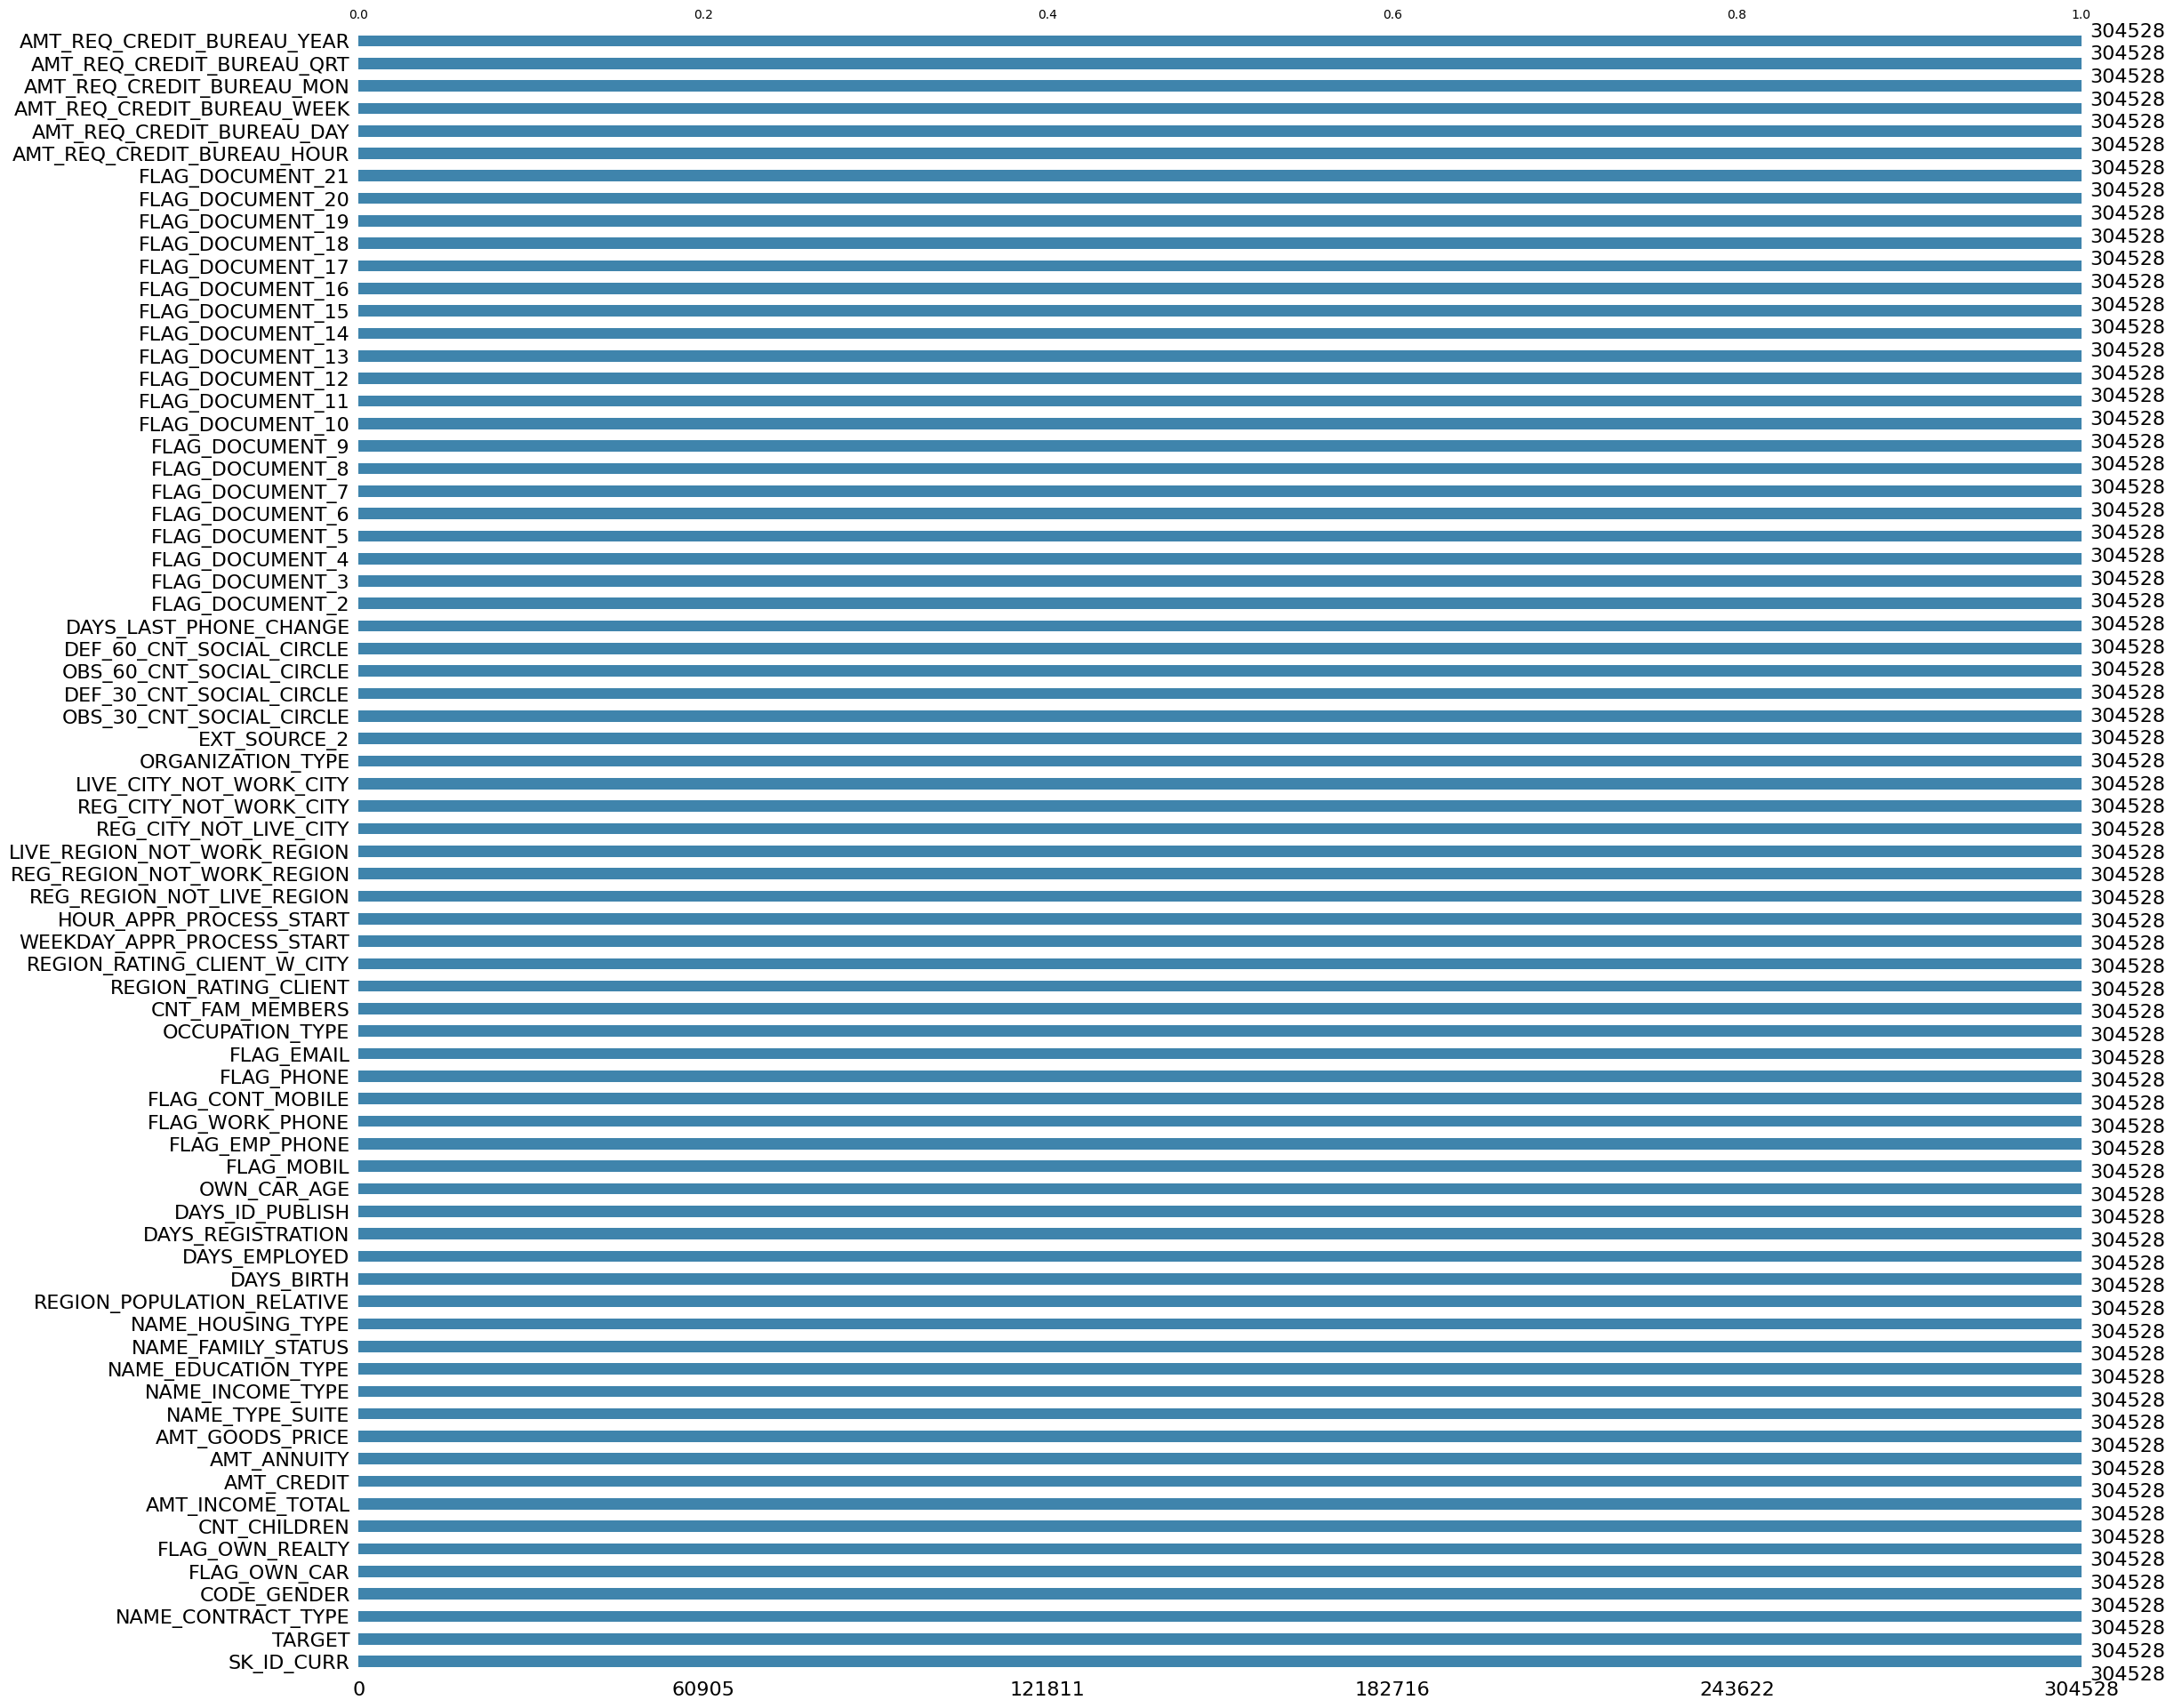

In [21]:
%matplotlib inline
missingno.bar(df, color=(63/255,132/255,172/255))

<AxesSubplot: >

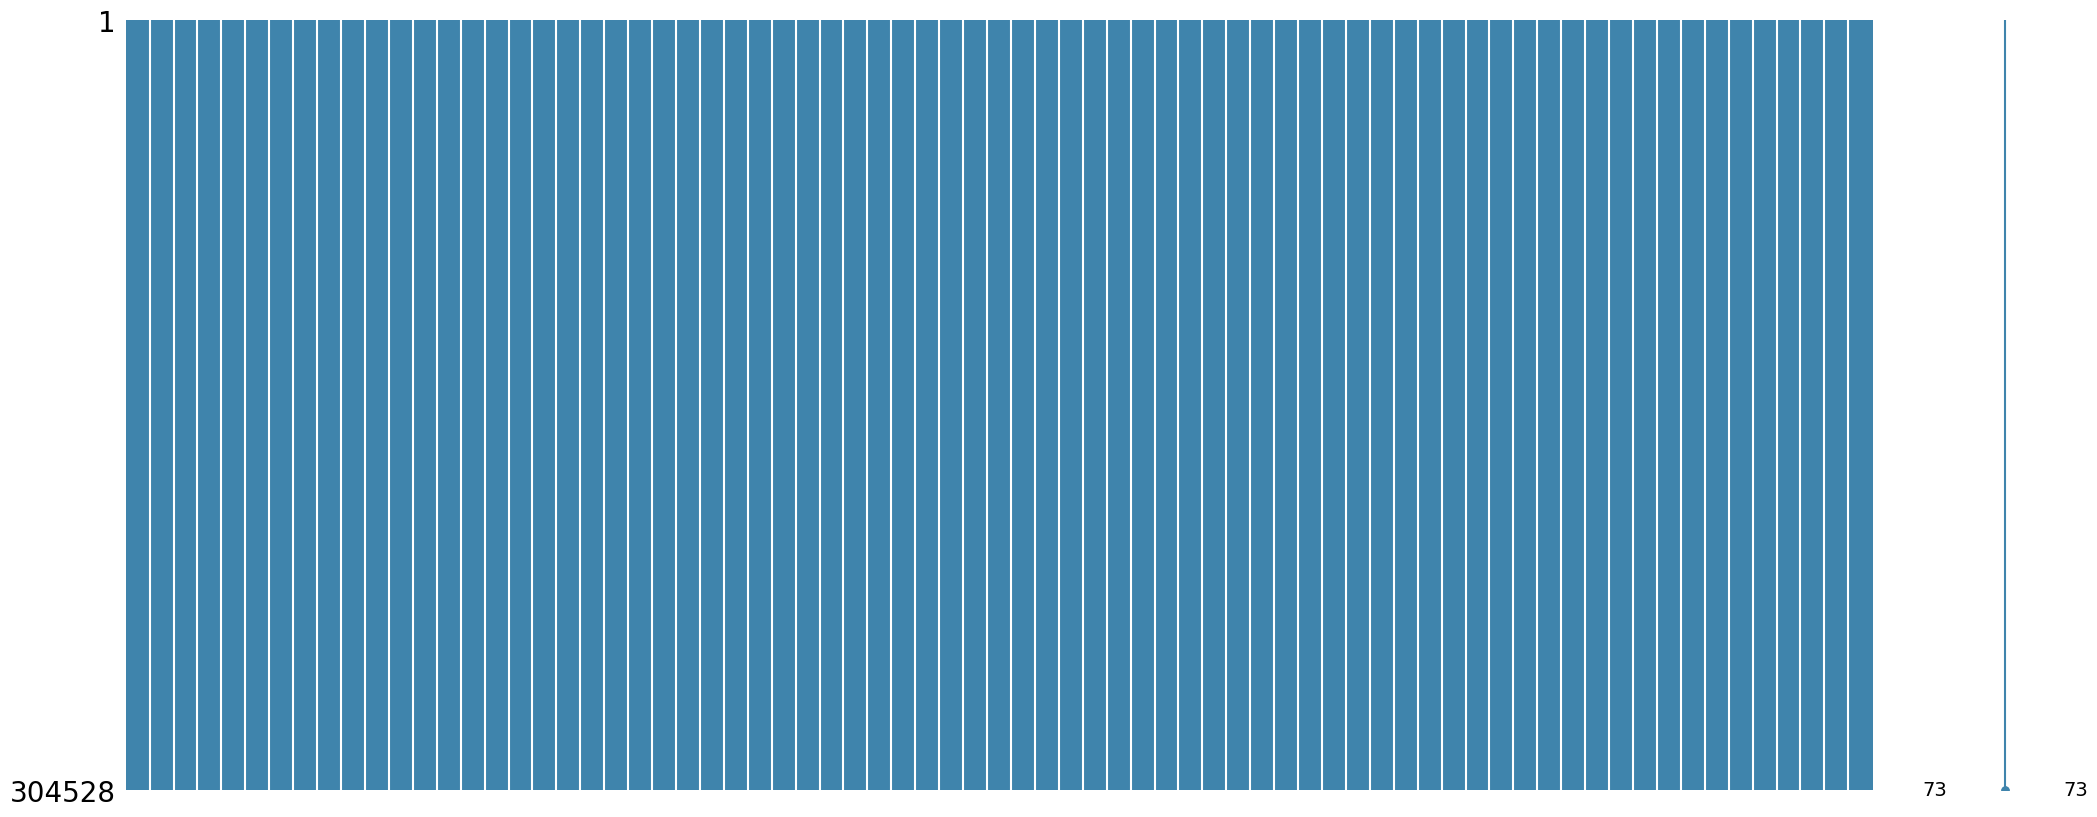

In [22]:
%matplotlib inline
missingno.matrix(df, color=(63/255,132/255,172/255))

In [25]:
len(df.columns)

73